# 4.10 Coding Etiquette & Excel Reporting

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\Jeet\Desktop\Instacart Basket analysis2'

In [3]:
# Import ords_prods_cust Dataset

final_df = pd.read_pickle(os.path.join(path, 'Prepared data', 'ords_prods_custss.pkl'))

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Check shape of data frame
final_df.shape

(32406041, 34)

In [5]:
# Check data types

final_df.dtypes

order_id                     int32
user_id                     object
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float16
new_customer                  bool
product_id                    int8
add_to_cart_order          float16
reordered                     int8
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float16
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_hours               object
max_order                     int8
loyalty_flag                object
average_price_spent        float16
spending_flag               object
frequent_customers         float16
frequency_flag              object
First Name                  object
Last Name                   object
Gender                      object
State               

In [6]:
# Delete any duplicate or unnecessary columns

df = final_df.drop(columns = ['_merge'])

In [7]:
df = df.drop(columns = ['new_customer'])

In [8]:
df = df.drop(columns = ['busiest_day'])

According to the security concern, the data set have the First Name and Last Name. I Will prefer to remove the name which i didnot required for analysis and for the identification, the user_id is enough.

In [9]:
# Removing First and Last Name due to security reason
df = df.drop(columns = ['First Name', 'Last Name'])

In [11]:
# Confirming the changes
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequent_customers,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [12]:
# Check dataframe dimension
df.shape

(32406041, 29)

In [13]:
# Check the frequency of state column
df['State'].value_counts(dropna = False)

Pennsylvania            667094
California              659828
Rhode Island            656935
Georgia                 656414
New Mexico              654499
Arizona                 654005
North Carolina          651928
Oklahoma                651760
Alaska                  648519
Minnesota               647851
Massachusetts           646378
Wyoming                 644283
Virginia                641432
Missouri                640761
Texas                   640432
Colorado                639293
Maine                   638593
North Dakota            638507
Alabama                 638041
Kansas                  637570
Louisiana               637506
Delaware                637049
South Carolina          636768
Oregon                  636442
Nevada                  636163
Arkansas                636158
New York                636003
Montana                 635280
South Dakota            633786
Illinois                633059
Hawaii                  632922
Washington              632877
Mississi

In [14]:
# Defining Regions acc to states location
regionNE = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [15]:
regionSE = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia'] 

In [16]:
regionMW = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'North Dakota', 'Nebraska', 'South Dakota', 'Wisconsin']

In [17]:
regionSW = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']

In [18]:
regionW = ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Nevada', 'Montana', 'Oregon', 'Utah', 'Washington', 'Wyoming']

In [19]:
# Create if-state with the loc function

df.loc[df['State'].isin (regionNE), 'region'] = 'Northeast'

In [20]:
df.loc[df['State'].isin (regionSE), 'region'] = 'Southeast'

In [21]:
df.loc[df['State'].isin (regionMW), 'region'] = 'Midwest'

In [22]:
df.loc[df['State'].isin (regionSW), 'region'] = 'Southwest'

In [23]:
df.loc[df['State'].isin (regionW), 'region'] = 'West'

In [24]:
# Check frequency of the Region
df['region'].value_counts(dropna = False)

Southeast    9500108
Midwest      7597585
West         6984713
Northeast    5722939
Southwest    2600696
Name: region, dtype: int64

In [25]:
# Check region in Datasets
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_customers,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income,region
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast


In [26]:
#Determine whether there's a difference in spending habits between the different U.S regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [27]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
Southeast,184817,9315291
Southwest,50751,2549945
West,134479,6850234


The Resultis showing that there is a difference in the spending habits among the different U.S regions. There are more low-spenders in all the different regions. The data also show that the high spenders are located in the West regions -Southwest, Midwest and West.

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

Reviewed and will use 'max_order' column to create exclusion flag

In [28]:
#Creating the exclusion flag
df.loc[df['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df.loc[df['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [29]:
df['exclusion flag'].value_counts(dropna = False)

high-activity    30965686
low-activity      1440355
Name: exclusion flag, dtype: int64

In [30]:
# check datframe
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income,region,exclusion flag
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity


In [31]:
# Dropping low activity from dataframe
df_2 = df.drop(df[df.max_order < 5].index)

In [32]:
# Check dataframe shape after dropping low activity 

df_2.shape

(30965686, 31)

In [34]:
# Export data frame excluding less than 5 orders

df_2.to_pickle(os.path.join(path, 'Prepared data', 'df_low_activity.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

AGE

In [35]:
df['Age'].describe()

count    3.240604e+07
mean     4.946525e+01
std      1.848557e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

The minimum age group is 18 and the max age group is 81 with the mean 49. we will made the group with generation gap label:

    A) Gen Z: 18-26
    B) Millennials: 27-42
    C) Gen X: 43-58
    D) Boomers II: 59-68
    E) Boomers I: 69-77
    F) Post War: 78-81

In [36]:
# Creating age_flag
df.loc[df['Age'] <= 26, 'age_flag'] = 'Gen Z'

In [37]:
df.loc[(df['Age'] <= 42) & (df['Age'] >= 27), 'age_flag'] = 'Millennials'

In [38]:
df.loc[(df['Age'] <= 58) & (df['Age'] >= 43), 'age_flag'] = 'Gen X'

In [39]:
df.loc[(df['Age'] <= 68) & (df['Age'] >= 59), 'age_flag'] = 'Boomers II'

In [40]:
df.loc[(df['Age'] <= 77) & (df['Age'] >= 69), 'age_flag'] = 'Boomers I'

In [41]:
df.loc[df['Age'] >= 78, 'age_flag'] = 'Post War'

In [42]:
# Check value counts

df['age_flag'].value_counts(dropna = False)

Gen X          8183399
Millennials    8094327
Boomers II     4976626
Gen Z          4558171
Boomers I      4543857
Post War       2049661
Name: age_flag, dtype: int64

INCOME

In [43]:
df['income'].describe()

count    3.240604e+07
mean     9.943761e+04
std      4.305710e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.661700e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

The minimum income is 25,900 and the maximum is 593,000. we will alott the following income groups
    
       A) Low: 32,048 or less
       B) Lower_Middle: 32,049 - 53,413
       C) Middle_Class: 53,414 - 106,827
       D) Upper_Middle_Class: 106,828 - 373,894
       E) Wealthy: 373,895 and up

In [44]:
# Create income_flag
df.loc[df['income'] <= 32048, 'income_flag'] = 'Low Class'

In [45]:
df.loc[(df['income'] >= 32049) & (df['income'] <= 53413), 'income_flag'] = 'Lower_Middle_Class'

In [46]:
df.loc[(df['income'] >= 53414) & (df['income'] <= 106827), 'income_flag'] = 'Middle_Class'

In [47]:
df.loc[(df['income'] >= 106828) & (df['income'] <= 373894 ), 'income_flag'] = 'Upper_Middle_Class'

In [48]:
df.loc[df['income'] >= 373895, 'income_flag'] = 'Wealthy Class'

In [49]:
# Check frequency for income_flag
df['income_flag'].value_counts(dropna = False)

Middle_Class          15246932
Upper_Middle_Class    12811974
Lower_Middle_Class     3764367
Low Class               523780
Wealthy Class            58988
Name: income_flag, dtype: int64

 DEPARTMENT

In [50]:
# Check department_id values frequency
df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     704111
11     447629
18     423802
6      269253
5      153743
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [51]:
# Import department data
df_dept = pd.read_csv(os.path.join(path,'Prepared data', 'departments_wrangled.csv'))

In [52]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [53]:
#Rename column Unnamed: 0 to department_id
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [54]:
# Combine data sets on department_id
df_merge = df.merge(df_dept, on = 'department_id')

In [55]:
#checking the dataset
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages


In [57]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, 'Prepared data', 'df_merge.pkl'))

In [58]:
df.to_pickle(os.path.join(path, 'Prepared Data', 'df.pkl'))

In [59]:
#checking the frequencz
df_merge['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           704111
personal care       447629
babies              423802
international       269253
alcohol             153743
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [60]:
# Create a data dictionary
dept = zip(df_merge['department_id'], df_merge['department'])

In [61]:
depts_dict = dict(dept)

In [62]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

Departments are categorized already by section.

In [63]:
df_merge.shape

(32406041, 34)

NUMBER OF DEPENDANTS

In [64]:
#checking the frequency 
df_merge['n_dependants'].value_counts(dropna = False)

3    8135377
0    8097859
2    8091396
1    8081409
Name: n_dependants, dtype: int64

The dependants range from 0-3 dependants. I will range as follows

    A) Single Adult: 0 dependants
    B) Family with baby: if their order falls under department of id 18 'babies'
    C) Family: 1-3 dependants and if their order does not include id 18 'babies'

In [65]:
# Create a flag for family_status

df_merge.loc[df_merge['n_dependants'] <= 0, 'family_flag'] = 'single adult'

In [66]:
df_merge.loc[(df_merge['department_id'] == 18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family with baby'

In [67]:
df_merge.loc[(df_merge['department_id'] !=18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family'

In [68]:
df_merge['family_flag'].value_counts(dropna = False)

family              23990874
single adult         8097859
family with baby      317308
Name: family_flag, dtype: int64

In [69]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family


### 6. Create an appropriate visualization to show the distribution of profiles

<AxesSubplot:>

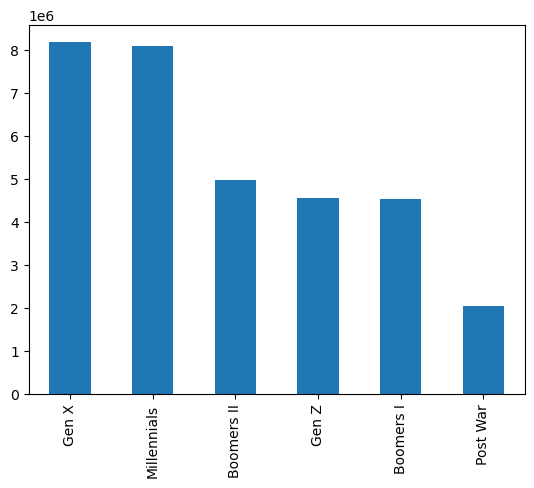

In [70]:
# Create bar chart for age_flag 
df_merge['age_flag'].value_counts().plot.bar()

Most of the customers are Gen X or Millennials

<AxesSubplot:>

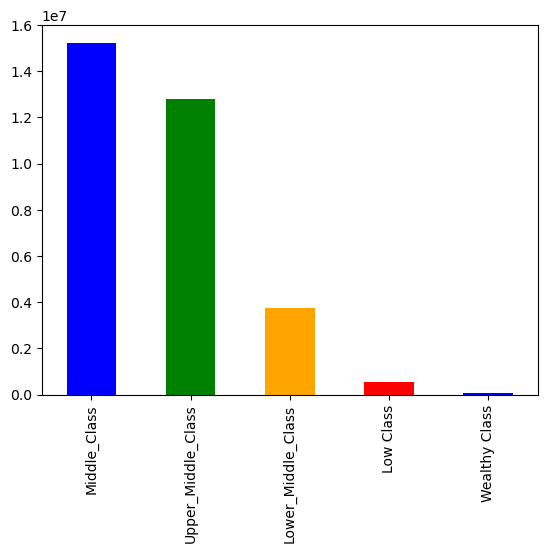

In [71]:
# Create bar chart for income_flag
df_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'orange', 'red'])

<AxesSubplot:>

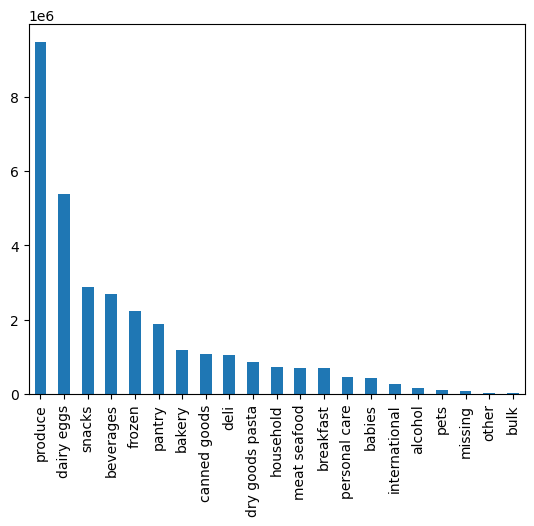

In [72]:
# create chart for deparment
df_merge['department'].value_counts().plot.bar()

<AxesSubplot:>

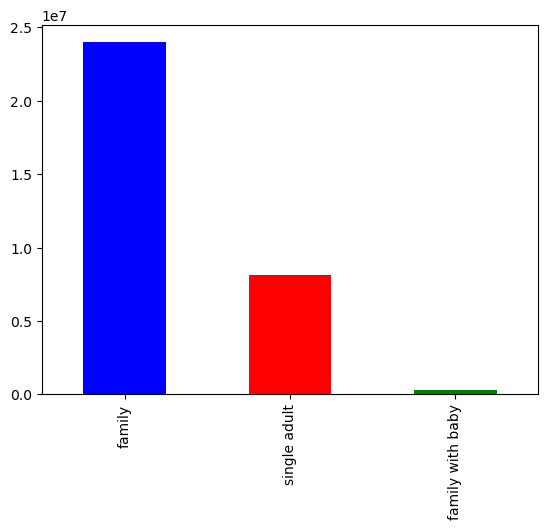

In [74]:
df_merge['family_flag'].value_counts().plot.bar(color = ['blue', 'red', 'green'])

In [39]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merge.pkl'))
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df.pkl'))